In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [12]:
files = glob.glob('../CONTPEAKS/GA/*.csv')
files.sort()
#Number of Trials
trials = 3
#File name beginining
nb = 26
#File name ending
ne = -10
#Output file
name = '../CONTPEAKS/contpeaks.csv'
#Range
r = [5,10,50,100,200,300,400,500]

In [13]:
files

['../CONTPEAKS/GA/CONTPEAKS_GA100_10_10_1_LOG.csv',
 '../CONTPEAKS/GA/CONTPEAKS_GA100_10_10_2_LOG.csv',
 '../CONTPEAKS/GA/CONTPEAKS_GA100_10_10_3_LOG.csv',
 '../CONTPEAKS/GA/CONTPEAKS_GA100_10_30_1_LOG.csv',
 '../CONTPEAKS/GA/CONTPEAKS_GA100_10_30_2_LOG.csv',
 '../CONTPEAKS/GA/CONTPEAKS_GA100_10_30_3_LOG.csv',
 '../CONTPEAKS/GA/CONTPEAKS_GA100_10_50_1_LOG.csv',
 '../CONTPEAKS/GA/CONTPEAKS_GA100_10_50_2_LOG.csv',
 '../CONTPEAKS/GA/CONTPEAKS_GA100_10_50_3_LOG.csv',
 '../CONTPEAKS/GA/CONTPEAKS_GA100_30_10_1_LOG.csv',
 '../CONTPEAKS/GA/CONTPEAKS_GA100_30_10_2_LOG.csv',
 '../CONTPEAKS/GA/CONTPEAKS_GA100_30_10_3_LOG.csv',
 '../CONTPEAKS/GA/CONTPEAKS_GA100_30_30_1_LOG.csv',
 '../CONTPEAKS/GA/CONTPEAKS_GA100_30_30_2_LOG.csv',
 '../CONTPEAKS/GA/CONTPEAKS_GA100_30_30_3_LOG.csv',
 '../CONTPEAKS/GA/CONTPEAKS_GA100_30_50_1_LOG.csv',
 '../CONTPEAKS/GA/CONTPEAKS_GA100_30_50_2_LOG.csv',
 '../CONTPEAKS/GA/CONTPEAKS_GA100_30_50_3_LOG.csv',
 '../CONTPEAKS/GA/CONTPEAKS_GA100_50_10_1_LOG.csv',
 '../CONTPEA

In [14]:
dfs = []
for indx, f in enumerate(files):
    dfs.append(pd.read_csv(f))

In [15]:
df_concats = []
for x in range(0,len(dfs),trials):
    df_concat = pd.concat([dfs[x+i] for i in range(trials)])
    by_row_index = df_concat.groupby(df_concat.index)
    df_means = by_row_index.mean()
    df_concats.append(df_means.loc[r])

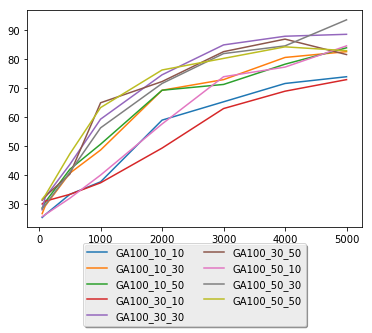

In [16]:
ax = plt.subplot(111)
for i,row in enumerate(df_concats):
    ax.plot(row[['iterations']],row[['fitness']], label = files[i*trials][nb:ne])
    
ax.legend()    
chartBox = ax.get_position()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2)
plt.show()

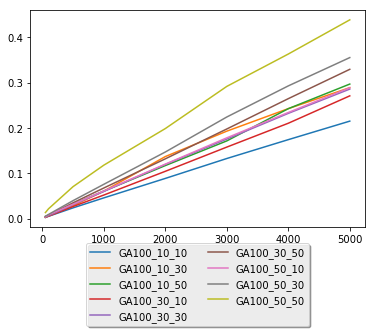

In [17]:
ax = plt.subplot(111)
for i,row in enumerate(df_concats):
    ax.plot(row[['iterations']],row[['time']], label = files[i*trials][nb:ne])
    
ax.legend()    
chartBox = ax.get_position()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2)
plt.show()

In [18]:
for i in range(len(df_concats)):
    print(i, files[i*trials][nb:ne])

0 GA100_10_10
1 GA100_10_30
2 GA100_10_50
3 GA100_30_10
4 GA100_30_30
5 GA100_30_50
6 GA100_50_10
7 GA100_50_30
8 GA100_50_50


In [19]:
#Change this
df = df_concats[7]
df

,iterations,fitness,time,fevals
5,50.0,28.333333,0.005579,3897.000000
10,100.0,29.666667,0.009462,7041.333333
50,500.0,41.000000,0.039951,32191.666667
100,1000.0,56.333333,0.075924,63661.333333
200,2000.0,71.666667,0.147060,126706.333333
300,3000.0,82.000000,0.224204,189752.666667
400,4000.0,84.666667,0.292712,252724.000000
500,5000.0,93.666667,0.355065,315678.333333


In [20]:
with open(name, 'a') as f:
    f.write('#Genetic Algorithm\n')
    
df.to_csv(name, sep=',', mode='a', header=True)